First we need to spend some time exploring the data and setting up the dataset that will be used for training and testing.

In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
classes=[ 'buildings', 'sea', 'forest','mountain', 'street', 'glacier']
class_dict={'buildings':0, 'sea':1, 'forest':2,'mountain':3, 'street':4, 'glacier':5}
dictionary={0:'buildings', 1:'sea', 2:'forest',3:'mountain', 4:'street', 5:'glacier'}
SIZE=(150,150)

Next step is to load the data from the folders where they are stored.

In [3]:
dataset_train_path='/Users/ahmedsadiq/Desktop/BrainStation/capstone_data/111880_269359_bundle_archive/seg_train/seg_train'
dataset_test_path='/Users/ahmedsadiq/Desktop/BrainStation/capstone_data/111880_269359_bundle_archive/seg_test/seg_test'

First we load the train dataset.

In [4]:
images_train=[]
labels_train=[]
final_train_output=[]


for folder in os.listdir(dataset_train_path):
    if folder==".DS_Store":
        continue
    label=class_dict[folder]
    
    for file in os.listdir(os.path.join(dataset_train_path,folder)):
        image_path=os.path.join(os.path.join(dataset_train_path, folder), file)
        
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, SIZE) 
        
        images_train.append(image)
        labels_train.append(label)

images_train = np.array(images_train, dtype='float32')
labels_train = np.array(labels_train,dtype='int32')         

        
final_train_output.append((images_train, labels_train))
        
    

In [5]:
images_train.shape[0]

14034

Next we load the test dataset.

In [6]:
images_test=[]
labels_test=[]
final_test_output=[]


for folder in os.listdir(dataset_test_path):
    if folder==".DS_Store":
        continue    
    label=class_dict[folder]
    
    for file in os.listdir(os.path.join(dataset_test_path,folder)):
        image_path=os.path.join(os.path.join(dataset_test_path, folder), file)
        
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, SIZE) 
        
        images_test.append(image)
        labels_test.append(label)

images_test = np.array(images_test, dtype='float32')
labels_test = np.array(labels_test,dtype='int32') 
       

        
final_test_output.append((images_test, labels_test))

Next step is to ensure that the data was loaded properly. In order to
do this we can print out the shapes of the two datasets and see if it is correct.

In [7]:
print("Total Number of Training Samples:{}".format(images_train.shape[0]))
print("Total Number of Test Samples:{}".format(images_test.shape[0]))

Total Number of Training Samples:14034
Total Number of Test Samples:3000


An example of what the data looks like is below.

Looks like the data has been loaded properly as the number of images we have in our train and test datasets match the number of files in both the test and train folders. Also, it is important to do some EDA to ensure that the data the model will be trained on is not imbalanced i.e. similar number of images in each class.

In [8]:
classcount=np.unique(labels_train,return_counts=True)
classcount

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([2191, 2274, 2271, 2512, 2382, 2404]))

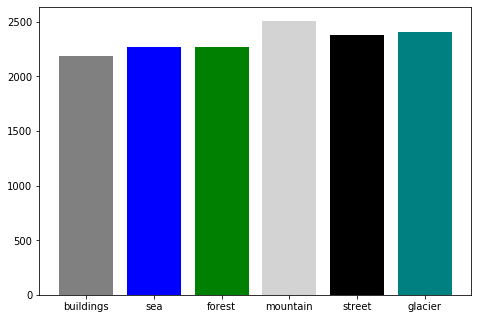

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = classes
count = classcount[1]
ax.bar(label,count,color=['gray', 'blue', 'green', 'Lightgray', 'black', 'teal'])
plt.show()

There is relatively the same count within each class. 

Good practice for image classification is to also scale the data, this is done below.

In [10]:
images_train=images_train/255.0


What does the image data look like?

In [11]:
from sklearn.utils import shuffle  

In [12]:
images_train, labels_train = shuffle(images_train, labels_train, random_state=25)

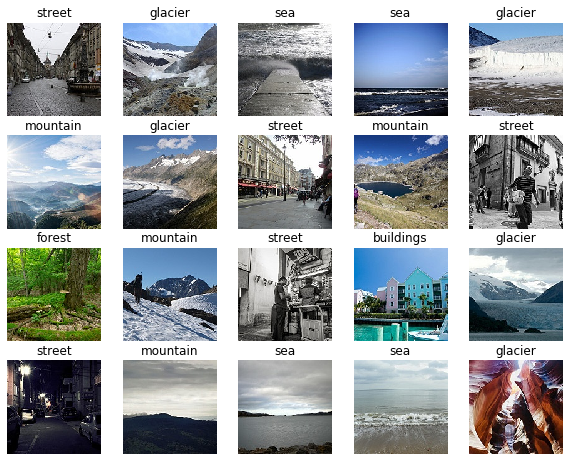

In [13]:
fig=plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(images_train[i])
    plt.xlabel('i')
    plt.title(dictionary[labels_train[i]])

According to the research done online a CNN would be the best model for this problem.

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150,150,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(images_train, labels_train, batch_size=128, epochs=10, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 81s 7ms/sample - loss: 2.7893 - acc: 0.4671 - val_loss: 0.9934 - val_acc: 0.6231
Epoch 2/10
11227/11227 [==============================] - 70s 6ms/sample - loss: 0.8417 - acc: 0.6883 - val_loss: 0.8190 - val_acc: 0.7175
Epoch 3/10
11227/11227 [==============================] - 70s 6ms/sample - loss: 0.5944 - acc: 0.7976 - val_loss: 0.8586 - val_acc: 0.6765
Epoch 4/10
11227/11227 [==============================] - 70s 6ms/sample - loss: 0.4351 - acc: 0.8651 - val_loss: 0.7226 - val_acc: 0.7535
Epoch 5/10
11227/11227 [==============================] - 80s 7ms/sample - loss: 0.3225 - acc: 0.9085 - val_loss: 0.7514 - val_acc: 0.7446
Epoch 6/10
11227/11227 [==============================] - 62s 6ms/sample - loss: 0.2257 - acc: 0.9433 - val_loss: 0.8136 - val_acc: 0.7296
Epoch 7/10
11227/11227 [==============================] - 77s 7ms/sample - loss: 0.1707 - acc: 0.9608 - val_loss: 0.8

Running this model a validiation accuracy of 75% is achieved.

In [39]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()



    plt.legend()
    plt.show()


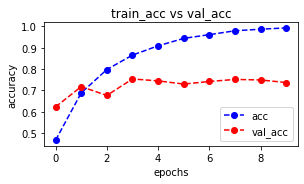

In [40]:
plot_accuracy_loss(history)

The following cells will carry out a further analysis of which categories are predicted incorrectly. From an understanding of the images in the data set it is likely that images that will be predicted incorrectly are likely to be streets and buildings as they tend to appear together in many photos as well as mountains and glaciers as they are of similar shape and sometimes similar color. 

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [22]:
pred=model.predict(images_test)
pred_labels=np.argmax(pred,axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

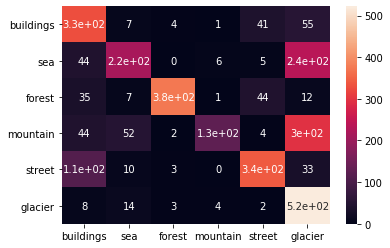

In [23]:
ConfMat=confusion_matrix(labels_test, pred_labels)
ax=plt.axes
sns.heatmap(ConfMat, annot=True, xticklabels=classes, yticklabels=classes)
plt.show

The above heatmap shows that generally the classifier works well. That being said there are a few categories that are consistently categorized incorrectly. As suspected a significant portion of the streets that were classified as buildings as well as many mountains that were classified as glaciers. Also, it is interesting to note that many pictures of seas were incorrectly classified as glaciers or mountains, this makes sense as looking further into the data as there are many photos that have seas adjacent to mountains and glaciers.

In order to improve the accuracy of the model VGG16 feature extraction can be used, the steps are outliined below.

In [38]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [25]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [26]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [27]:
VGG_Features_Train = model.predict(images_train)
VGG_Features_Test = model.predict(images_test)

In [29]:
w, x, y, z = VGG_Features_Train.shape


In [42]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (x, y, z)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

historyVGG = model2.fit(VGG_Features_Train, labels_train, batch_size=128, epochs=10, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 3s 248us/sample - loss: 0.6926 - acc: 0.7399 - val_loss: 0.4337 - val_acc: 0.8425
Epoch 2/10
11227/11227 [==============================] - 2s 206us/sample - loss: 0.3521 - acc: 0.8757 - val_loss: 0.3642 - val_acc: 0.8668
Epoch 3/10
11227/11227 [==============================] - 3s 270us/sample - loss: 0.2848 - acc: 0.8993 - val_loss: 0.3444 - val_acc: 0.8782
Epoch 4/10
11227/11227 [==============================] - 3s 225us/sample - loss: 0.2376 - acc: 0.9189 - val_loss: 0.3190 - val_acc: 0.8814
Epoch 5/10
11227/11227 [==============================] - 2s 194us/sample - loss: 0.2115 - acc: 0.9279 - val_loss: 0.3801 - val_acc: 0.8593
Epoch 6/10
11227/11227 [==============================] - 2s 191us/sample - loss: 0.1753 - acc: 0.9430 - val_loss: 0.3257 - val_acc: 0.8853
Epoch 7/10
11227/11227 [==============================] - 2s 217us/sample - loss: 0.1482 - acc: 0.9515 - val_lo

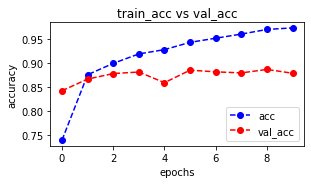

In [43]:
plot_accuracy_loss(historyVGG)

Using VGG feature extraction and running a new model, a new validation accuracy of 88.5% is achieved. 